In [1]:
!pip install aguaclara

     |████████████████████████████████| 92kB 2.6MB/s 
     |████████████████████████████████| 13.0MB 184kB/s 
     |████████████████████████████████| 163kB 47.6MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.1.12-cp36-none-any.whl size=95166 sha256=7bf50e631a500e2c23822607237f6d3ee871421d1846205cccf75adcbf764ba8
  Stored in directory: /root/.cache/pip/wheels/b7/8c/87/ea5385804b3a1f6a4ebebb2942cf8c4e4e3b995247f878601e
  Created wheel for pint: filename=Pint-0.8.1-py2.py3-none-any.whl size=134155 sha256=a0ab5249c3b65c7f0c010555546b884198cfbe41f83477c32ae8499daa39ca9f
  Stored in directory: /root/.cache/pip/wheels/b4/56/36/7c4d6a4e3660e233b95e3b0482551915cb184abca0f93ee1dd
Successfully built aguaclara pint
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1


In [0]:
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
from aguaclara.design.component import Component
import numpy as np
import matplotlib.pyplot as plt

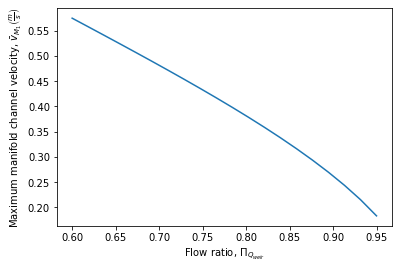

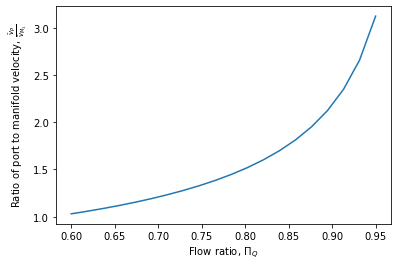

In [3]:
def Inlet_Channel_V_Max(H_weir,Ratio_Flow):
  return (2 * np.sqrt(u.gravity*H_weir*(1-Ratio_Flow**(2/3))/(1+Ratio_Flow**(2/3)))).to(u.m/u.s)

Ratio_Q_graph = np.linspace(0.6,0.95,20)

H_weir = 5 * u.cm
v_graph = np.empty_like(Ratio_Q_graph) * u.m/u.s
for i in range(20):
  v_graph[i] = Inlet_Channel_V_Max(H_weir,Ratio_Q_graph[i])

plt.plot(Ratio_Q_graph,v_graph)
plt.xlabel(r'Flow ratio, $\Pi_{Q_{weir}}$')
plt.ylabel(r'Maximum manifold channel velocity, $ \bar v_{M_1} \left(\frac{m}{s} \right)$')
plt.show()


def Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_Flow):
  return np.sqrt((Ratio_Flow**2 + 1)/(2*(1-Ratio_Flow**2)))

Ratio_V_graph = np.empty_like(Ratio_Q_graph)
for i in range(20):
  Ratio_V_graph[i] = Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_Q_graph[i])

plt.plot(Ratio_Q_graph,Ratio_V_graph)
plt.xlabel(r'Flow ratio, $\Pi_{Q}$')
plt.ylabel(r'Ratio of port to manifold velocity, $ \frac{\bar v_{P}}{\bar v_{M_1}}$')
plt.show()


In [21]:
v_FB = 1 * u.mm/u.s
W_Diffuser = 3.175 * u.mm
W_Sed = 1.07 * u.m
v_jet = v_FB * W_Sed/W_Diffuser
print('The jet velocity is',v_jet)
L_Sed = 6 * u.m
Ratio_Flow = 0.85
v_Influent_Manifold = v_jet / Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_Flow)
print('The manifold velocity is',v_Manifold)
Q_sed =(L_Sed * W_Sed * v_FB).to(u.L/u.s)
ID_min_Influent_Manifold = ac.diam_circle(Q_sed/v_Influent_Manifold)
print('The minimum manifold diameter is',ID_min_Influent_Manifold.to(u.inch))
SDR = 41
ID_Influent_Manifold = ac.ceil_nearest(ID_min_Influent_Manifold,ac.ID_SDR_all_available(SDR))
ND_Influent_Manifold = ac.ND_SDR_available(ID_Influent_Manifold,SDR)
print('The manifold nominal diameter is',ND_Influent_Manifold.to(u.inch))


The jet velocity is 0.337 meter / second
The manifold velocity is 0.5937 meter / second
The minimum manifold diameter is 8.138 inch
The manifold nominal diameter is 8 inch


Now design the effluent manifold for the sed tank

In [22]:
HL_orifice = 5 * u.cm
v_orifice_contracted = np.sqrt(2 * u.gravity * HL_orifice)
v_Effluent_Manifold = (v_orifice_contracted / Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_Flow)).to(u.m/u.s)
print('The maximum effluent manifold velocity is',v_Effluent_Manifold)
Q_sed =(L_Sed * W_Sed * v_FB).to(u.L/u.s)
ID_min_Effluent_Manifold = ac.diam_circle(Q_sed/v_Effluent_Manifold)
print('The minimum effluent manifold diameter is',ID_min_Effluent_Manifold.to(u.inch))
SDR = 41
ID_Effluent_Manifold = ac.ceil_nearest(ID_min_Effluent_Manifold,ac.ID_SDR_all_available(SDR))
ND_Effluent_Manifold = ac.ND_SDR_available(ID_Effluent_Manifold,SDR)
print('The manifold nominal diameter is',ND_Effluent_Manifold.to(u.inch))


The maximum effluent manifold velocity is 0.5621 meter / second
The minimum effluent manifold diameter is 4.748 inch
The manifold nominal diameter is 6 inch


In [20]:
print(Ratio_Pipe_Manifold_V_Port_to_V_Man(Ratio_Flow))

1.761704743594568
